In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/kaggle/input/distilbert-embeddings-daigtv4/preprocessed_daigt_v4_with_embeddings.csv')

# Convert the string of embeddings into a list of floats by removing brackets and commas
df['distilbert_embeddings'] = df['distilbert_embeddings'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))

# Display the first row to confirm the format
print(df[['cleaned_text', 'distilbert_embeddings']].head())



                                        cleaned_text  \
0  phone modern human today always phone always p...   
1  essay explain driver able use electronic devic...   
2  driving use cellular device today society thou...   
3  phone driving driver able use phone operating ...   
4  cell phone operation driving ability stay conn...   

                               distilbert_embeddings  
0  [0.13767536, 0.0266361572, 0.533420563, 0.0237...  
1  [-0.117960542, 0.11643555, 0.515749395, -0.102...  
2  [0.0441976674, 0.012582696, 0.46814099, 0.0114...  
3  [-0.05227492, 0.0885941088, 0.431456804, 0.013...  
4  [-0.0111779347, 0.0460575037, 0.43930921, -0.0...  


In [3]:
# Prepare the feature matrix (X) and labels (y)
X = np.vstack(df['distilbert_embeddings'].values)  # Stack embeddings into a 2D array
y = df['label']  # Replace 'label' with the actual name of your label column if different

In [4]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost Classifier with optimized parameters
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, eval_metric='logloss')

In [8]:
# Lists to store accuracy at each iteration
train_accuracies = []
test_accuracies = []

In [9]:
for i in range(1, xgb.n_estimators + 1):
    xgb.set_params(n_estimators=i)  # Incrementally increase the number of estimators
    xgb.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    train_pred = xgb.predict(X_train)
    test_pred = xgb.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [10]:
train_accuracies

[0.627255428319005,
 0.627255428319005,
 0.627255428319005,
 0.627255428319005,
 0.627255428319005,
 0.7691392843793537,
 0.8259030208297937,
 0.8513201264059261,
 0.8716062387440959,
 0.8817662849570151,
 0.8910598389343845,
 0.8964966529613646,
 0.9018994869006762,
 0.9060280675524143,
 0.9095789867137857,
 0.9122634136396072,
 0.9150837609161032,
 0.9172924666145639,
 0.9184987597268001,
 0.9203846545924088,
 0.9212341567841245,
 0.9227122905977098,
 0.9243093547181351,
 0.9248870162085018,
 0.925872438750892,
 0.9268748513371164,
 0.9281151245370213,
 0.9291685072547488,
 0.9304257704984878,
 0.9314281830847123,
 0.9324305956709368,
 0.9329063168982976,
 0.9338747493968534,
 0.934503381018723,
 0.9357606442624622,
 0.9361174351829827,
 0.9368310170240239,
 0.9373067382513847,
 0.93791837982942,
 0.938462061232118,
 0.9388528322403071,
 0.9398892249142002,
 0.9402630058785552,
 0.9409256175880933,
 0.9416901695606374,
 0.9419620102619864,
 0.9425906418838561,
 0.9431513133303884,
 0

In [11]:
test_accuracies

[0.6309208290859667,
 0.6309208290859667,
 0.6309208290859667,
 0.6309208290859667,
 0.6309208290859667,
 0.763846415222562,
 0.8161739721372749,
 0.8383961943594971,
 0.8573564390078151,
 0.8674821610601428,
 0.8768603465851172,
 0.8834522595990486,
 0.8883452259599048,
 0.891199456337071,
 0.8952089704383283,
 0.8974515800203874,
 0.8996262317363235,
 0.9021406727828746,
 0.9037037037037037,
 0.9056744818212709,
 0.9068977234114849,
 0.9079850492694529,
 0.909616038056405,
 0.9099558273870201,
 0.910907237512742,
 0.9118586476384641,
 0.9132857628270472,
 0.9135575942915393,
 0.9156642881413524,
 0.9160040774719673,
 0.9175671083927964,
 0.9179748555895345,
 0.9190621814475025,
 0.9197417601087325,
 0.9208970438328237,
 0.9214407067618077,
 0.9219164118246687,
 0.9223921168875298,
 0.9232076112810058,
 0.9230716955487598,
 0.9232755691471288,
 0.9236833163438668,
 0.9240231056744819,
 0.9242949371389738,
 0.9248386000679578,
 0.9254502208630649,
 0.9257220523275569,
 0.92606184165817

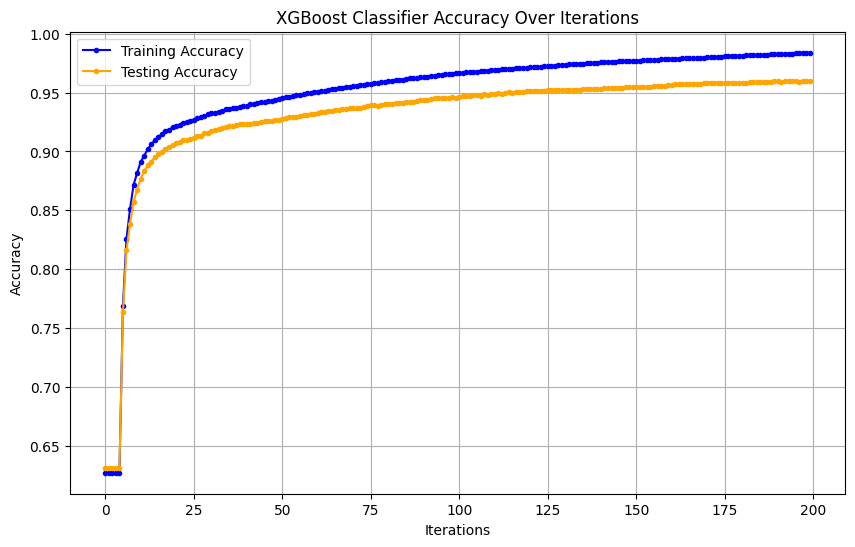

In [12]:
# Plot accuracy over iterations
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy', color='blue', marker='o', markersize=3)
plt.plot(test_accuracies, label='Testing Accuracy', color='orange', marker='o', markersize=3)
plt.title('XGBoost Classifier Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

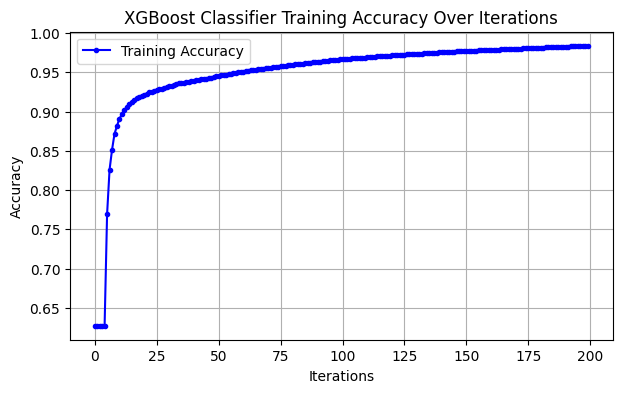

In [17]:
# Plot accuracy over iterations
plt.figure(figsize=(7,4))
plt.plot(train_accuracies, label='Training Accuracy', color='blue', marker='o', markersize=3)
plt.title('XGBoost Classifier Training Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

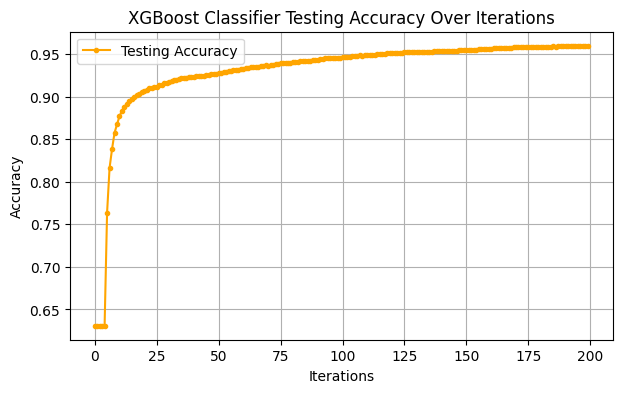

In [18]:
# Plot accuracy over iterations
plt.figure(figsize=(7, 4))
plt.plot(test_accuracies, label='Testing Accuracy', color='orange', marker='o', markersize=3)
plt.title('XGBoost Classifier Testing Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [13]:
# Make predictions on the test set
y_pred = xgb.predict(X_test)

In [14]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [15]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5431
           1       0.98      0.96      0.97      9284

    accuracy                           0.96     14715
   macro avg       0.95      0.96      0.96     14715
weighted avg       0.96      0.96      0.96     14715



In [16]:
import matplotlib.pyplot as plt

# Initialize XGBClassifier with eval_metric in the constructor
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, eval_metric='logloss')

# Initialize an empty dictionary to store evaluation results
evals_result = {}

# Fit the model with eval_set to track log loss over iterations
xgb.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        verbose=False)

# Extract log loss from the evaluation result
train_losses = xgb.evals_result()['validation_0']['logloss']
test_losses = xgb.evals_result()['validation_1']['logloss']


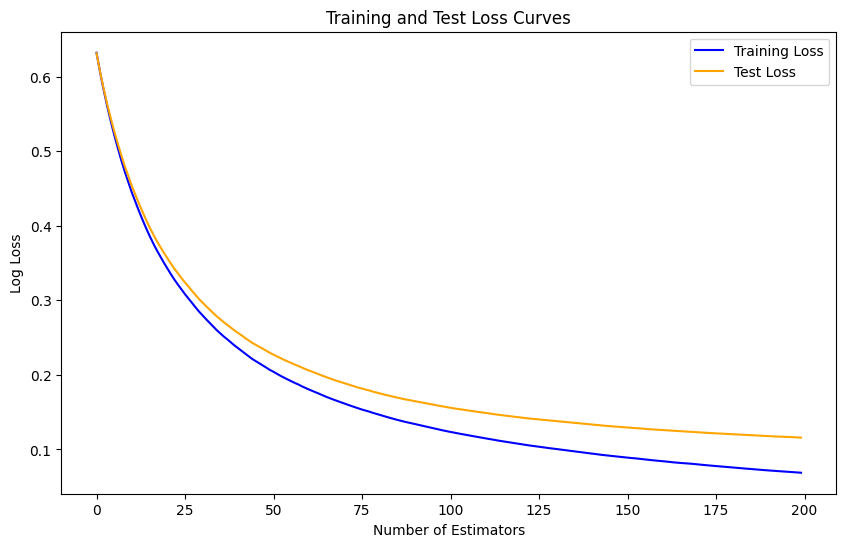

In [19]:
# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss", color='blue')
plt.plot(test_losses, label="Test Loss", color='orange')
plt.xlabel("Number of Estimators")
plt.ylabel("Log Loss")
plt.title("Training and Test Loss Curves")
plt.legend()
plt.show()

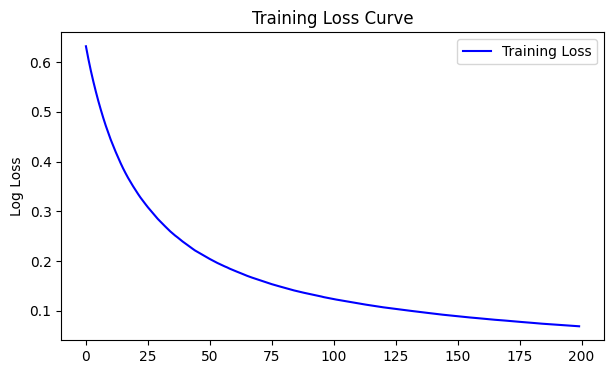

In [21]:
# Plot the loss curves
plt.figure(figsize=(7, 4))
plt.plot(train_losses, label="Training Loss", color='blue')
plt.ylabel("Log Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

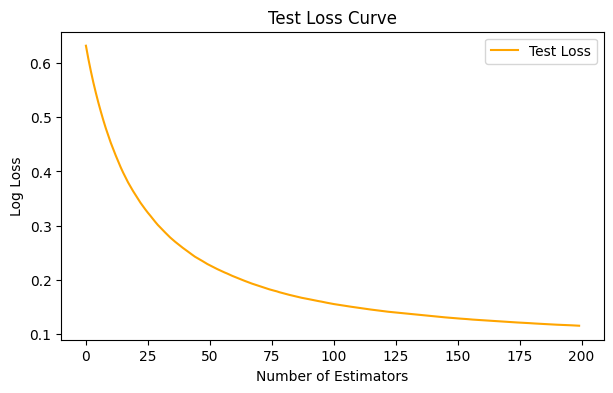

In [22]:
# Plot the loss curves
plt.figure(figsize=(7, 4))
plt.plot(test_losses, label="Test Loss", color='orange')
plt.xlabel("Number of Estimators")
plt.ylabel("Log Loss")
plt.title("Test Loss Curve")
plt.legend()
plt.show()

In [23]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Train Accuracy': train_accuracies,
    'Train Loss': train_losses,
    'Test Accuracy': test_accuracies,
    'Test Loss': test_losses
})


# Display the DataFrame as a table with borders
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

+-----+------------------+--------------+-----------------+-------------+
|     |   Train Accuracy |   Train Loss |   Test Accuracy |   Test Loss |
+=====+==================+==============+=================+=============+
|   0 |         0.627255 |    0.632069  |        0.630921 |    0.631421 |
+-----+------------------+--------------+-----------------+-------------+
|   1 |         0.627255 |    0.606172  |        0.630921 |    0.606705 |
+-----+------------------+--------------+-----------------+-------------+
|   2 |         0.627255 |    0.582537  |        0.630921 |    0.584286 |
+-----+------------------+--------------+-----------------+-------------+
|   3 |         0.627255 |    0.56092   |        0.630921 |    0.563566 |
+-----+------------------+--------------+-----------------+-------------+
|   4 |         0.627255 |    0.540823  |        0.630921 |    0.544632 |
+-----+------------------+--------------+-----------------+-------------+
|   5 |         0.769139 |    0.521953

In [24]:
# Sample classification report data
report = {
    'Human-Written': {'precision': 0.93, 'recall': 0.96, 'f1-score': 0.95, 'support': 5431},
    'Machine-Generated': {'precision': 0.98, 'recall': 0.96, 'f1-score': 0.97, 'support': 9284}
}

In [25]:
# Convert the classification report into a DataFrame
report_df = pd.DataFrame(report).T

In [26]:
# Plotting
labels = report_df.index
x = np.arange(len(labels))  # The label locations

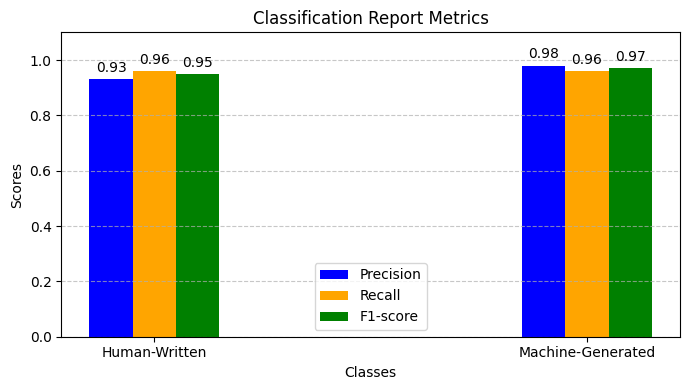

In [27]:
# Set width of the bars
width = 0.10

fig, ax = plt.subplots(figsize=(7, 4))

# Create bars for precision, recall, and F1-score
bars1 = ax.bar(x - width, report_df['precision'], width, label='Precision', color='blue')
bars2 = ax.bar(x, report_df['recall'], width, label='Recall', color='orange')
bars3 = ax.bar(x + width, report_df['f1-score'], width, label='F1-score', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding value annotations on top of the bars
def add_value_annotations(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_annotations(bars1)
add_value_annotations(bars2)
add_value_annotations(bars3)

plt.ylim(0, 1.1)  # Set y-axis limit to give space for annotations
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()